In [1]:
from data_generator import DataGenerator
from place_cells import PlaceCells

# cudnn.benchmark = True

class AttrDict(dict):
    def __init__(self, *args, **kwargs):
        super(AttrDict, self).__init__(*args, **kwargs)
        self.__dict__ = self

options = AttrDict()

options.sequence_length = 100
options.periodic = False
options.batch_size = 228
options.box_width = 2.2
options.box_height = 2.2

pc = PlaceCells(n_P=10, func_type='DiffGaussTuningCurve', gpu=True)

dg = DataGenerator(options, pc, gpu=True)

# format: (inputs, place_outputs, pos)
inputs, place_outputs, pos = dg.get_test_batch()


init_pos shape torch.Size([228, 1, 2])
init_actv shape torch.Size([228, 2])


In [6]:
init_pos = inputs[1].cpu().numpy()
velocity_signal = inputs[0].cpu().numpy()
pos = pos.cpu().numpy()
place_outputs = place_outputs.cpu().numpy()

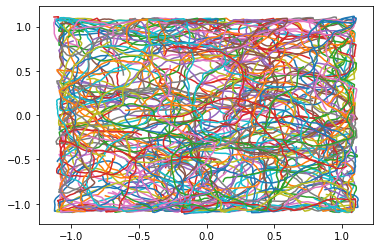

In [7]:
import matplotlib.pyplot as plt

for i in range(options.batch_size):
    plt.plot(pos[i,:,0], pos[i,:,1])
plt.show()

In [7]:
place_outputs.shape

(228, 100, 10)

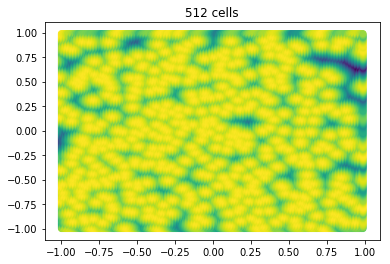

In [40]:
import numpy as np 
from torch import from_numpy

x = np.arange(-pc.L/2, pc.L/2, .01)
y = np.arange(-pc.L/2, pc.L/2, .01)
locations = np.array(np.meshgrid(x, y)).T.reshape((-1,2))

pc = PlaceCells(n_P=512, L=2, sigma_1=.2, sigma_2=.4, func_type='DiffGaussTuningCurve', gpu=True)
diff_resp = pc.encode_pos(from_numpy(locations).unsqueeze(0)).max(axis=-1).values.cpu().numpy()
# diff_resp = PC.get_responses(locations, func_type='DiffGaussTuningCurve')
h = plt.scatter(locations[:,0],locations[:,1], c=diff_resp.squeeze())
plt.title('512 cells')
plt.show()

# PC = PlaceCells(n_P=1024)
# diff_resp = np.max(PC.get_responses(locations, func_type='DiffGaussTuningCurve'), axis=1)
# # diff_resp = PC.get_responses(locations, func_type='DiffGaussTuningCurve')
# h = plt.scatter(locations[:,0],locations[:,1], c=diff_resp)
# plt.title('1024 cells')
# plt.show()

In [30]:
from torch import from_numpy
from_numpy(locations).size(0)

484

In [ ]:
from_numpy(locations).view(1, -1).size(1)

In [ ]:
from_numpy(locations).unsqueeze(0).size(2)

In [ ]:
pc.encode_pos(from_numpy(locations).unsqueeze(0)).max(axis=-1)

In [ ]:
pc.encode_pos(from_numpy(locations).unsqueeze(0)).max(axis=-1).values.cpu().numpy().shape

In [19]:
 pc.encode_pos(from_numpy(locations).unsqueeze(0)).shape

torch.Size([1, 4, 10])

In [28]:
locations.shape

(4, 2)